In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
#from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,roc_curve,auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
#from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

# Q1. Data pre-processing - Understand the data and treat missing values, outliers

In [2]:
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
data.head(10)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4.0,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2.0,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1.0,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3.0,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1.0,8.9,3,0,1,0,0,0,0


In [4]:
data = data.apply(lambda x: x.fillna(x.median()),axis=0)
data.sample(10)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3044,3045,41,16,15,94124,2.0,0.3,2,83,0,0,0,0,0
4924,4925,36,12,89,91304,2.0,2.7,1,0,0,0,0,0,0
2045,2046,52,28,44,95051,4.0,0.9,2,107,0,0,0,1,0
4623,4624,50,25,45,90813,2.0,0.6,3,0,0,0,0,0,0
3085,3086,55,29,71,91311,3.0,0.3,2,0,0,0,0,0,1
188,189,64,40,169,91320,2.0,2.1,1,122,0,0,0,1,0
1405,1406,46,22,183,91605,1.0,3.1,2,0,1,0,1,1,1
2136,2137,50,26,115,95008,1.0,1.2,3,0,1,0,0,0,1
3830,3831,34,8,34,92130,2.0,2.0,3,0,0,1,0,1,0
6,7,53,27,72,91711,2.0,1.5,2,0,0,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                       5000 non-null int64
Age (in years)           5000 non-null int64
Experience (in years)    5000 non-null int64
Income (in K/month)      5000 non-null int64
ZIP Code                 5000 non-null int64
Family members           5000 non-null float64
CCAvg                    5000 non-null float64
Education                5000 non-null int64
Mortgage                 5000 non-null int64
Personal Loan            5000 non-null int64
Securities Account       5000 non-null int64
CD Account               5000 non-null int64
Online                   5000 non-null int64
CreditCard               5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,5000.0,2.395800,1.145340,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
def remove_outlier(data_in, col_name):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = data_in.loc[(data_in[col_name] > fence_low) & (data_in[col_name] < fence_high)]
    return data_out

data = remove_outlier(data,'Age (in years)')
data = remove_outlier(data,'Experience (in years)')
data = remove_outlier(data,'Income (in K/month)')
data = remove_outlier(data,'Family members')
data = remove_outlier(data,'CCAvg')
data = remove_outlier(data,'Mortgage')

data

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4.0,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2.0,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1.0,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3.0,0.6,2,104,0,0,0,1,0
10,11,65,39,105,94710,4.0,2.4,3,0,0,0,0,0,0


# Q2. Understanding the attributes - Find relationship between different attributes (Independent variables) and  choose carefully which all attributes have to be a part of the analysis and why

In [8]:
data.corr()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.003125,-0.002065,-0.009507,0.008811,-0.021235,-0.003586,0.023710,-0.019289,-0.019372,-0.018822,-0.007579,-0.008646,0.015192
Age (in years),-0.003125,1.000000,0.994101,-0.035647,-0.030398,-0.060017,-0.022512,0.033298,-0.007147,-0.016993,0.006250,0.006320,0.018733,0.011939
Experience (in years),-0.002065,0.994101,1.000000,-0.027590,-0.029237,-0.065210,-0.024592,0.005176,-0.006298,-0.013510,0.004772,0.008851,0.018438,0.013145
Income (in K/month),-0.009507,-0.035647,-0.027590,1.000000,-0.014363,-0.135228,0.515360,-0.149816,-0.068801,0.463220,0.002265,0.116338,0.004443,0.006270
ZIP Code,0.008811,-0.030398,-0.029237,-0.014363,1.000000,0.005192,-0.008412,-0.023982,0.009729,0.000570,-0.002095,0.014682,0.025076,0.000662
Family members,-0.021235,-0.060017,-0.065210,-0.135228,0.005192,1.000000,-0.048949,0.022005,0.032520,0.012541,0.022956,-0.000781,0.015635,-0.002136
CCAvg,-0.003586,-0.022512,-0.024592,0.515360,-0.008412,-0.048949,1.000000,-0.065909,-0.020436,0.324950,0.020672,0.084427,-0.022237,0.003316
Education,0.023710,0.033298,0.005176,-0.149816,-0.023982,0.022005,-0.065909,1.000000,0.007166,0.095488,-0.013874,-0.005748,-0.027136,-0.019122
Mortgage,-0.019289,-0.007147,-0.006298,-0.068801,0.009729,0.032520,-0.020436,0.007166,1.000000,-0.030733,-0.006722,0.011390,-0.014883,0.001112
Personal Loan,-0.019372,-0.016993,-0.013510,0.463220,0.000570,0.012541,0.324950,0.095488,-0.030733,1.000000,0.016388,0.246670,-0.015423,-0.006129


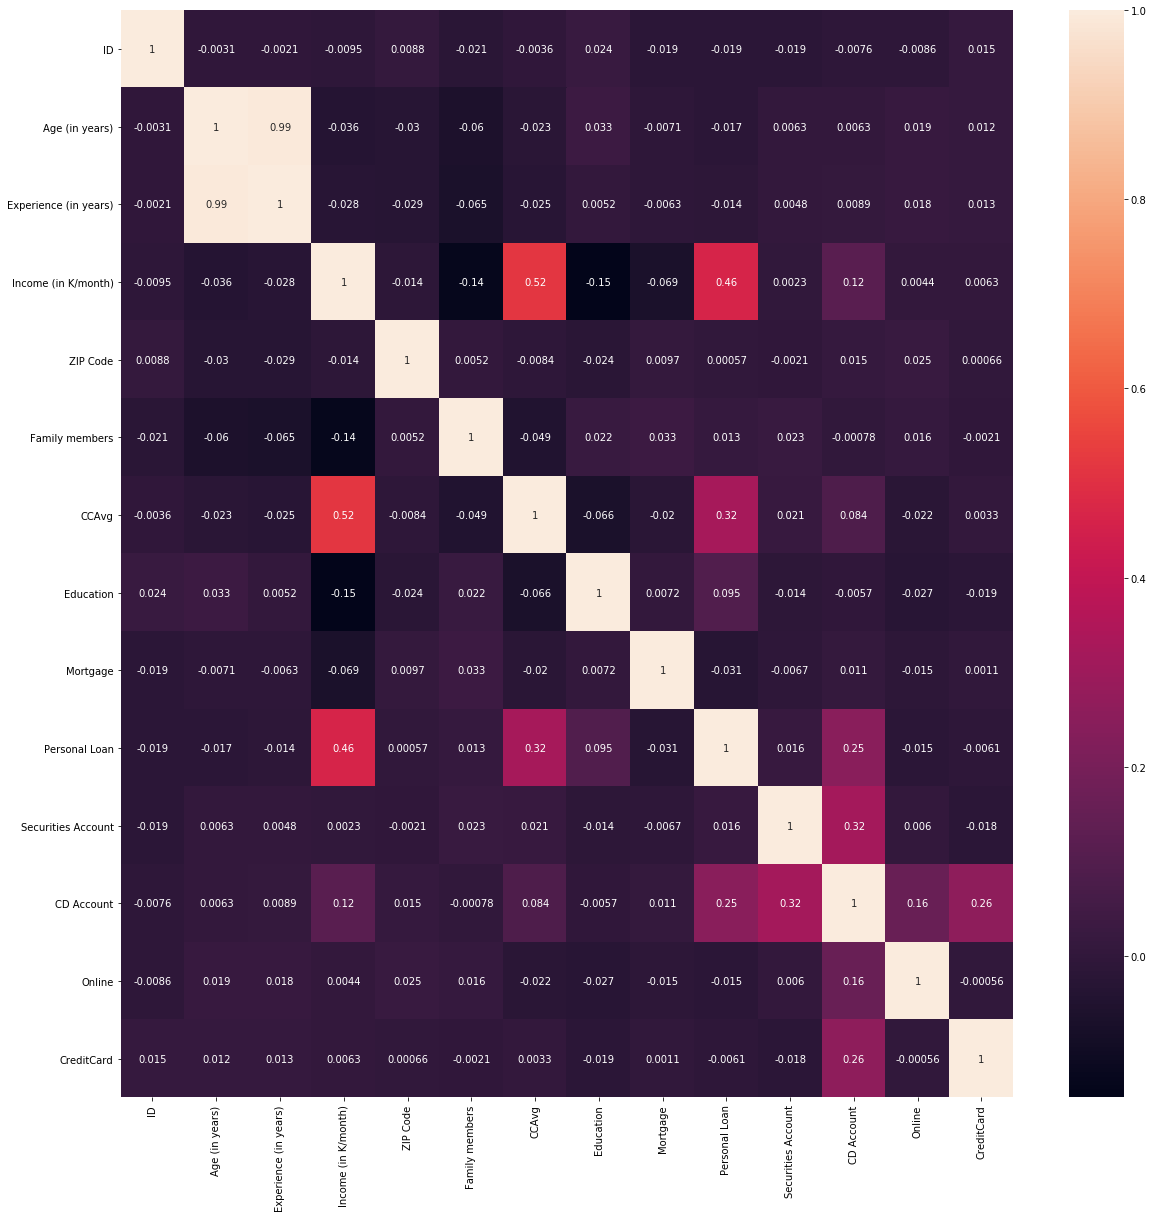

In [9]:
plt.figure (figsize= (20,20))
sns.heatmap(data.corr(), annot=True )

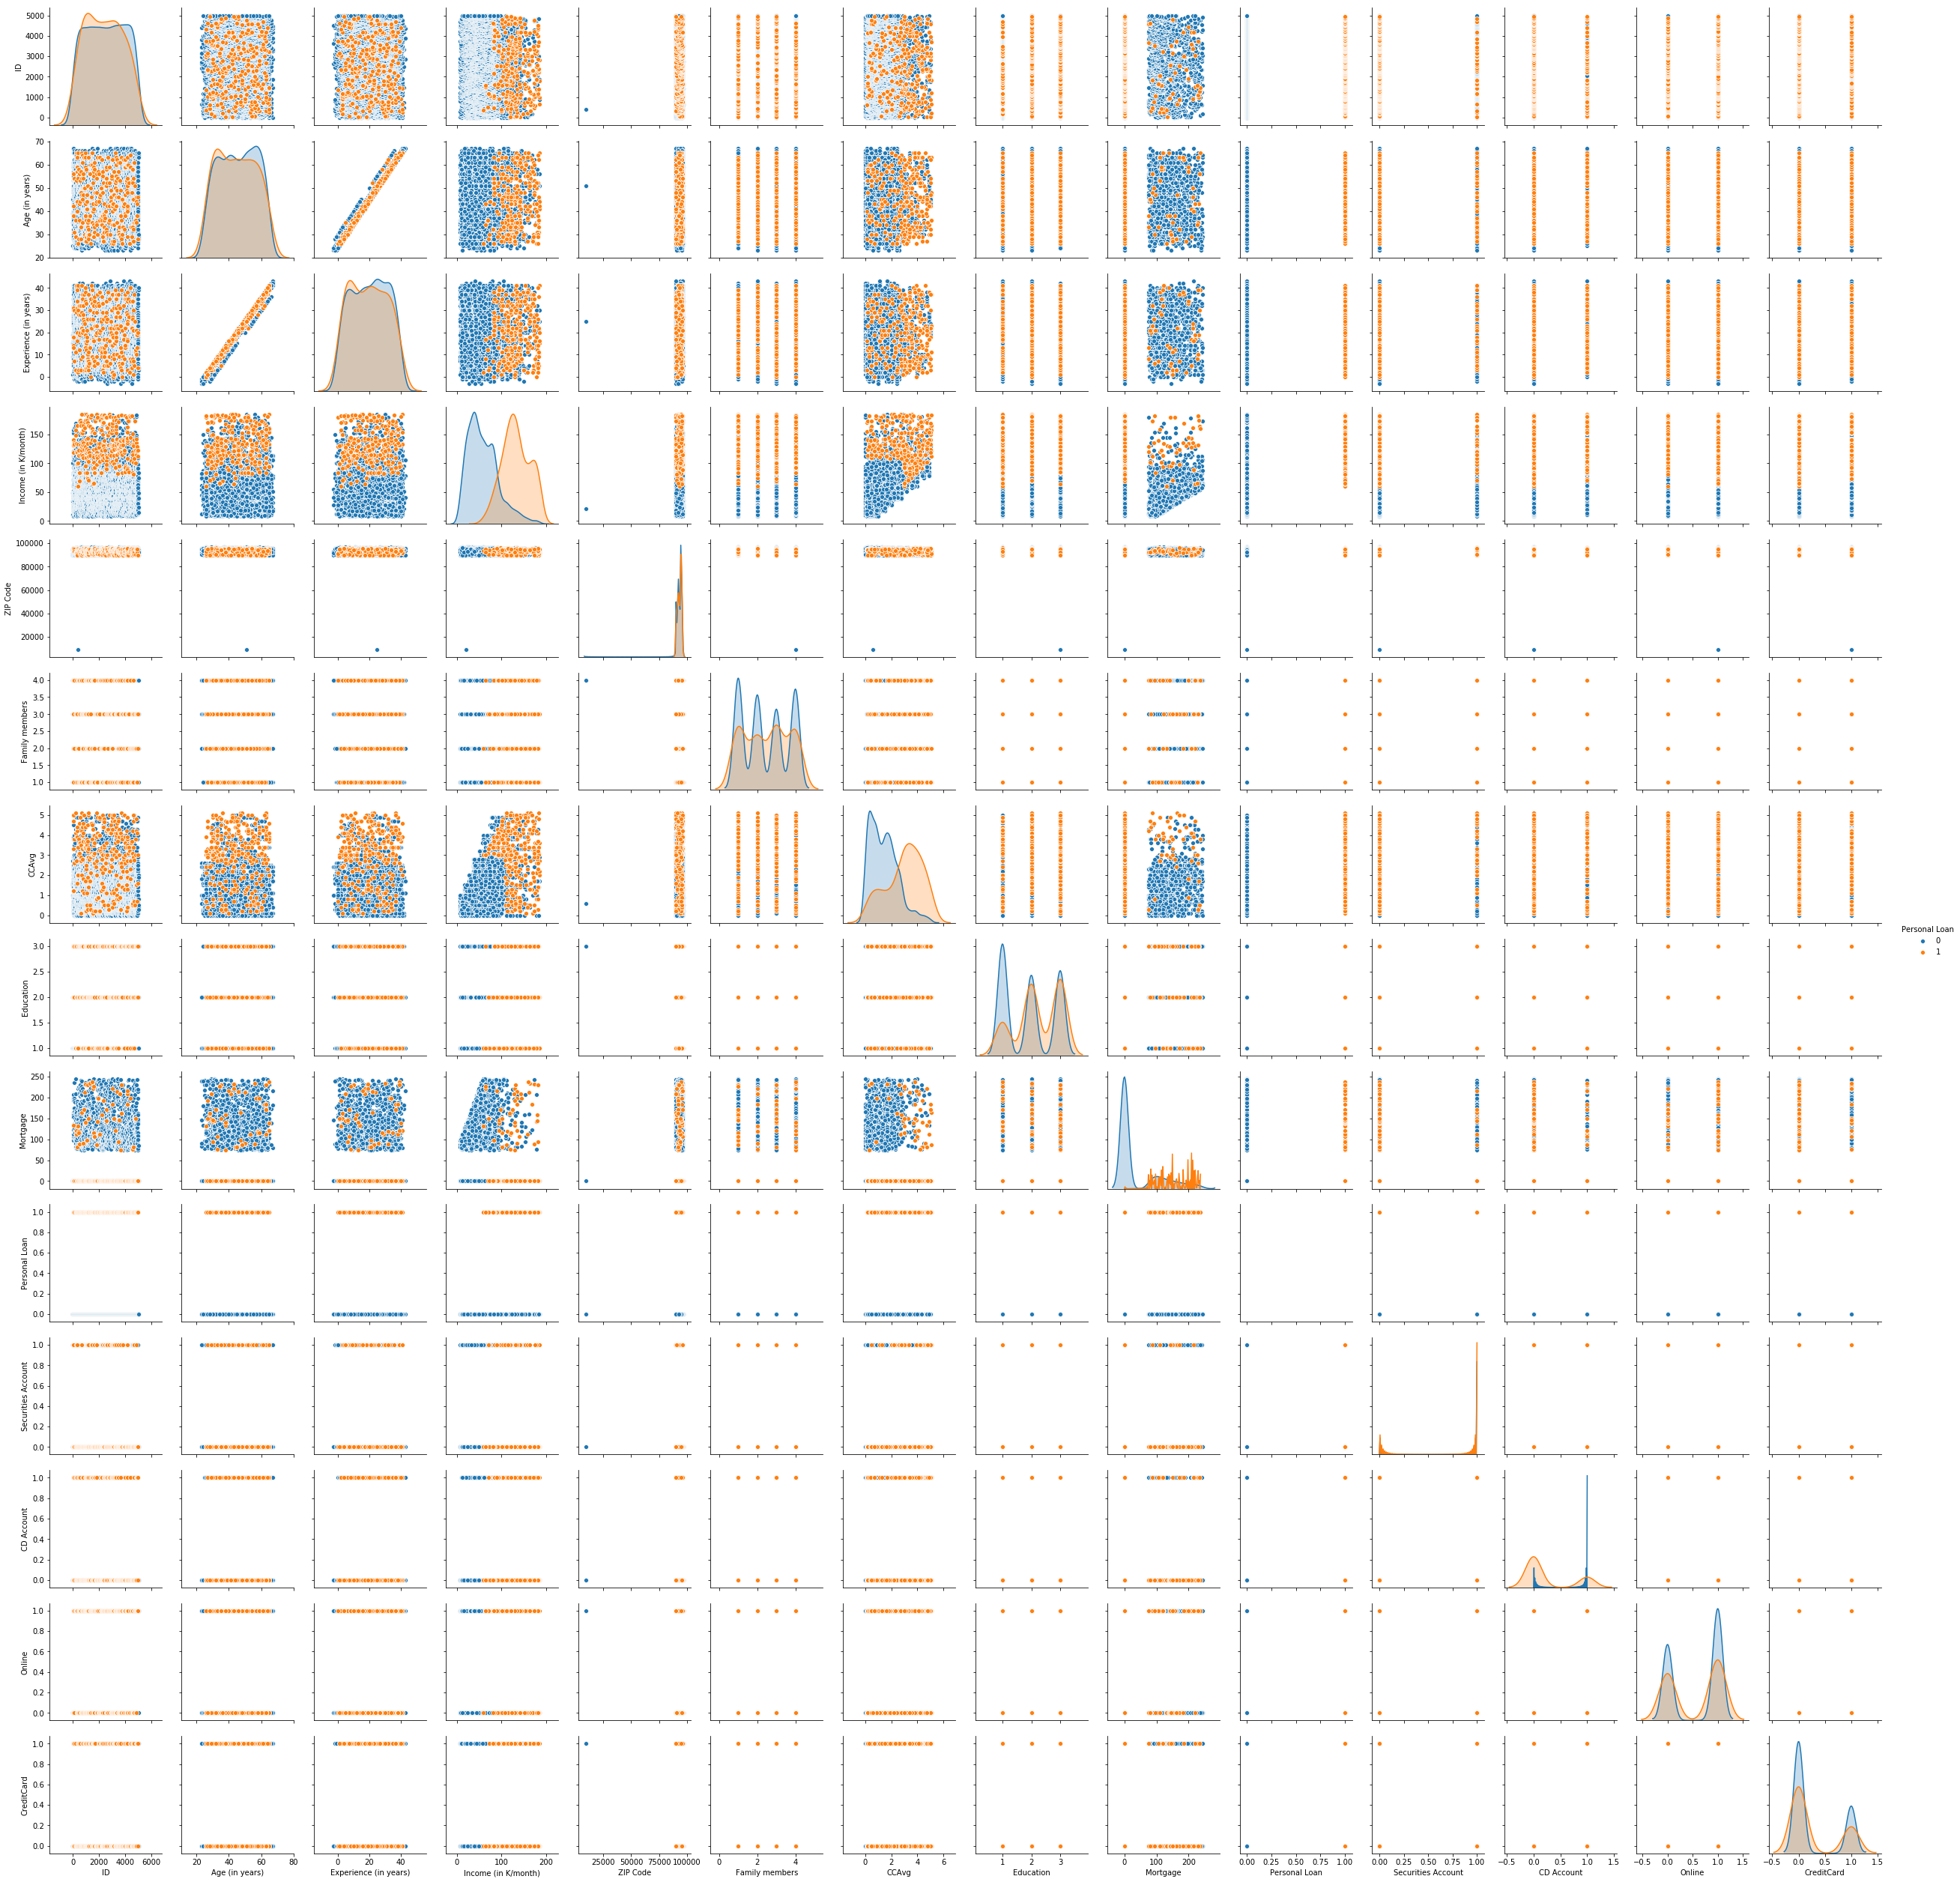

In [10]:
sns.pairplot( data , hue = "Personal Loan" )

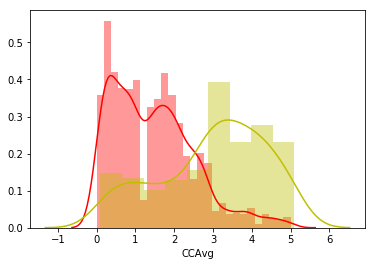

In [11]:
sns.distplot(data[data['Personal Loan'] == 0]['CCAvg'],color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['CCAvg'],color = 'y')

Customers who have taken Personal Loan have higher CCAvg , so CCAvg is a good predictor for finding the person will take loan or not

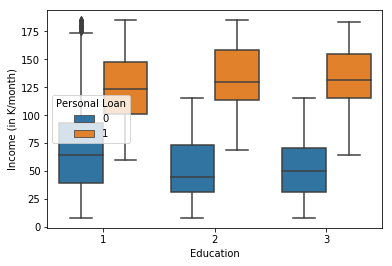

In [12]:
sns.boxplot(x = "Education" , y = "Income (in K/month)" , hue="Personal Loan" , data = data)

Above Graph shows that Personal Loan is independet of Education

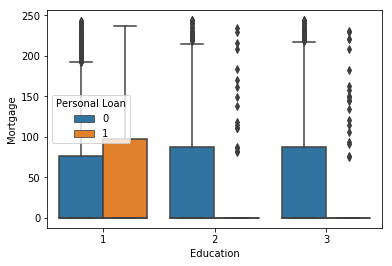

In [13]:
sns.boxplot (x = "Education" , y = "Mortgage" , hue = "Personal Loan" , data = data)

Above graph shows that Person who takes loan has higher mortgage as well

In [14]:
X = data.drop(['Education' ,'Personal Loan' , 'ID'],axis = 1)
Y = data["Personal Loan"]

In [15]:
test_size = 0.30
seed = 7
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
x_train, x_test, y_train, y_test

(      Age (in years)  Experience (in years)  Income (in K/month)  ZIP Code  \
 3797              61                     35                   31     92521   
 3733              58                     32                   72     94105   
 2659              60                     35                   43     91763   
 2797              65                     39                   53     94608   
 3542              30                      5                  118     92182   
 1723              39                     15                   55     95821   
 1786              35                     11                   34     93117   
 3801              34                      8                   20     95616   
 1958              28                      2                   42     95762   
 1128              30                      5                  171     94025   
 259               56                     30                   55     94107   
 3890              42                     17        

# Q3. Model the data using Logistic regression

In [16]:
LGR_Model = LogisticRegression()
LGR_Model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
y_predictedtest = LGR_Model.predict(x_test)

# Q4. Find the accuracy of the model using confusion matrix

In [18]:
metrics.confusion_matrix(y_test , y_predictedtest)

array([[1219,   16],
       [  55,   18]])

In [19]:
metrics.accuracy_score(y_test,y_predictedtest)

0.9457186544342507

# Q5. Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression

In [20]:
def calculate_accuracy_score(model):
    y_predictTrain=model.predict(x_train)
    y_predictTest=model.predict(x_test)
    testAccuracy= metrics.accuracy_score(y_test,y_predictTest)
    return testAccuracy

In [21]:
def build_knn_Model(k):
    NNHModel = KNeighborsClassifier(n_neighbors= k)
    NNHModel.fit(x_train, y_train.values.ravel())
    return NNHModel

def build_and_calculate_accuracy_for_KNN(k):
    model1 = build_knn_Model(k)
    testAccuracy = calculate_accuracy_score(model1)
    print("Test data accuracy with k = %d is %f" % (model1.n_neighbors,testAccuracy))

In [22]:
build_and_calculate_accuracy_for_KNN (3)
build_and_calculate_accuracy_for_KNN (5)
build_and_calculate_accuracy_for_KNN (7)
build_and_calculate_accuracy_for_KNN (11)
build_and_calculate_accuracy_for_KNN (13)

Test data accuracy with k = 3 is 0.940367
Test data accuracy with k = 5 is 0.940367
Test data accuracy with k = 7 is 0.941131
Test data accuracy with k = 11 is 0.941896
Test data accuracy with k = 13 is 0.941131


Logistic Regression has higher accuracy than KKN model for k = 7 